In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(2003.4369)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 120446.10454  validloss 333688.47966±0.00000  bestvalidloss 333688.47966  last_update 0
train: iter 1  trainloss 47316.11111  validloss 71848.58031±0.00000  bestvalidloss 71848.58031  last_update 0
train: iter 2  trainloss 987.96304  validloss 39002.79390±0.00000  bestvalidloss 39002.79390  last_update 0
train: iter 3  trainloss 942.25081  validloss 1863.87497±0.00000  bestvalidloss 1863.87497  last_update 0
train: iter 4  trainloss 835.08734  validloss 1508.16915±0.00000  bestvalidloss 1508.16915  last_update 0
train: iter 5  trainloss 735.98476  validloss 1016.28469±0.00000  bestvalidloss 1016.28469  last_update 0
train: iter 6  trainloss 703.44594  validloss 946.81656±0.00000  bestvalidloss 946.81656  last_update 0
train: iter 7  trainloss 669.94877  validloss 886.71554±0.00000  bestvalidloss 886.71554  last_update 0
train: iter 8  trainloss 626.55396  validloss 1159.53416±0.00000  bestvalidloss 886.71554  last_update 1
train: iter 9  trai

train: iter 77  trainloss -436.36894  validloss -414.87126±0.00000  bestvalidloss -558.39190  last_update 2
train: iter 78  trainloss -521.76364  validloss -498.48801±0.00000  bestvalidloss -558.39190  last_update 3
train: iter 79  trainloss -508.86293  validloss -553.62995±0.00000  bestvalidloss -558.39190  last_update 4
train: iter 80  trainloss -496.24194  validloss -539.35321±0.00000  bestvalidloss -558.39190  last_update 5
train: iter 81  trainloss -477.08315  validloss -486.87085±0.00000  bestvalidloss -558.39190  last_update 6
train: iter 82  trainloss -506.10949  validloss -469.94720±0.00000  bestvalidloss -558.39190  last_update 7
train: iter 83  trainloss -518.70114  validloss -519.51673±0.00000  bestvalidloss -558.39190  last_update 8
train: iter 84  trainloss -558.60543  validloss -602.66474±0.00000  bestvalidloss -602.66474  last_update 0
train: iter 85  trainloss -471.60275  validloss -548.73065±0.00000  bestvalidloss -602.66474  last_update 1
train: iter 86  trainloss -4

train: iter 153  trainloss -854.65646  validloss -856.45031±0.00000  bestvalidloss -894.53877  last_update 7
train: iter 154  trainloss -820.68121  validloss -788.45257±0.00000  bestvalidloss -894.53877  last_update 8
train: iter 155  trainloss -642.49916  validloss -589.83952±0.00000  bestvalidloss -894.53877  last_update 9
train: iter 156  trainloss -822.47238  validloss -699.71912±0.00000  bestvalidloss -894.53877  last_update 10
train: iter 157  trainloss -867.73864  validloss -863.97212±0.00000  bestvalidloss -894.53877  last_update 11
train: iter 158  trainloss -839.51359  validloss -881.11601±0.00000  bestvalidloss -894.53877  last_update 12
train: iter 159  trainloss -772.01697  validloss -797.67419±0.00000  bestvalidloss -894.53877  last_update 13
train: iter 160  trainloss -782.61418  validloss -838.76117±0.00000  bestvalidloss -894.53877  last_update 14
train: iter 161  trainloss -828.19688  validloss -771.73169±0.00000  bestvalidloss -894.53877  last_update 15
train: iter 1

train: iter 228  trainloss -1050.28277  validloss -1052.85261±0.00000  bestvalidloss -1128.06484  last_update 3
train: iter 229  trainloss -1025.02822  validloss -1060.72319±0.00000  bestvalidloss -1128.06484  last_update 4
train: iter 230  trainloss -1008.96983  validloss -884.93203±0.00000  bestvalidloss -1128.06484  last_update 5
train: iter 231  trainloss -1020.33276  validloss -1041.76978±0.00000  bestvalidloss -1128.06484  last_update 6
train: iter 232  trainloss -1074.70858  validloss -1091.58470±0.00000  bestvalidloss -1128.06484  last_update 7
train: iter 233  trainloss -1106.41714  validloss -1093.49059±0.00000  bestvalidloss -1128.06484  last_update 8
train: iter 234  trainloss -978.13333  validloss -1123.23520±0.00000  bestvalidloss -1128.06484  last_update 9
train: iter 235  trainloss -1062.16747  validloss -762.84576±0.00000  bestvalidloss -1128.06484  last_update 10
train: iter 236  trainloss -1051.46562  validloss -1179.25728±0.00000  bestvalidloss -1179.25728  last_upd

train: iter 302  trainloss -1167.07081  validloss -1007.11840±0.00000  bestvalidloss -1317.17735  last_update 1
train: iter 303  trainloss -1181.11453  validloss -1338.81557±0.00000  bestvalidloss -1338.81557  last_update 0
train: iter 304  trainloss -1274.36064  validloss -1240.78512±0.00000  bestvalidloss -1338.81557  last_update 1
train: iter 305  trainloss -1223.54317  validloss -1301.41601±0.00000  bestvalidloss -1338.81557  last_update 2
train: iter 306  trainloss -1274.06018  validloss -1313.36755±0.00000  bestvalidloss -1338.81557  last_update 3
train: iter 307  trainloss -1181.55453  validloss -1277.01270±0.00000  bestvalidloss -1338.81557  last_update 4
train: iter 308  trainloss -1239.99847  validloss -1273.27642±0.00000  bestvalidloss -1338.81557  last_update 5
train: iter 309  trainloss -1194.16548  validloss -1302.88399±0.00000  bestvalidloss -1338.81557  last_update 6
train: iter 310  trainloss -1143.01347  validloss -1000.94432±0.00000  bestvalidloss -1338.81557  last_u

train: iter 375  trainloss -1326.38396  validloss -1316.75375±0.00000  bestvalidloss -1392.99297  last_update 17
train: iter 376  trainloss -1336.47629  validloss -1374.79687±0.00000  bestvalidloss -1392.99297  last_update 18
train: iter 377  trainloss -1081.82947  validloss -1187.79435±0.00000  bestvalidloss -1392.99297  last_update 19
train: iter 378  trainloss -1297.74912  validloss -1212.92881±0.00000  bestvalidloss -1392.99297  last_update 20
train: iter 379  trainloss -1308.96300  validloss -1346.98030±0.00000  bestvalidloss -1392.99297  last_update 21
train: iter 380  trainloss -1293.78160  validloss -1406.91974±0.00000  bestvalidloss -1406.91974  last_update 0
train: iter 381  trainloss -1319.35740  validloss -1280.91203±0.00000  bestvalidloss -1406.91974  last_update 1
train: iter 382  trainloss -1363.16685  validloss -1405.81283±0.00000  bestvalidloss -1406.91974  last_update 2
train: iter 383  trainloss -1259.79012  validloss -1364.35285±0.00000  bestvalidloss -1406.91974  l

train: iter 448  trainloss -1279.33746  validloss -1423.25374±0.00000  bestvalidloss -1450.13160  last_update 1
train: iter 449  trainloss -1306.73851  validloss -1034.62930±0.00000  bestvalidloss -1450.13160  last_update 2
train: iter 450  trainloss -1246.08474  validloss -1429.12471±0.00000  bestvalidloss -1450.13160  last_update 3
train: iter 451  trainloss -1355.97292  validloss -1174.95231±0.00000  bestvalidloss -1450.13160  last_update 4
train: iter 452  trainloss -1146.98205  validloss -1310.43428±0.00000  bestvalidloss -1450.13160  last_update 5
train: iter 453  trainloss -1204.34381  validloss -1055.26439±0.00000  bestvalidloss -1450.13160  last_update 6
train: iter 454  trainloss -1350.32740  validloss -1345.08742±0.00000  bestvalidloss -1450.13160  last_update 7
train: iter 455  trainloss -1379.91715  validloss -1381.35147±0.00000  bestvalidloss -1450.13160  last_update 8
train: iter 456  trainloss -1361.11147  validloss -1350.97122±0.00000  bestvalidloss -1450.13160  last_u

train: iter 521  trainloss -1358.18689  validloss -1148.98571±0.00000  bestvalidloss -1496.69924  last_update 18
train: iter 522  trainloss -1443.82387  validloss -1391.93887±0.00000  bestvalidloss -1496.69924  last_update 19
train: iter 523  trainloss -1406.05874  validloss -1431.79289±0.00000  bestvalidloss -1496.69924  last_update 20
train: iter 524  trainloss -1439.30207  validloss -1395.61512±0.00000  bestvalidloss -1496.69924  last_update 21
train: iter 525  trainloss -1428.18017  validloss -1414.84212±0.00000  bestvalidloss -1496.69924  last_update 22
train: iter 526  trainloss -1434.47211  validloss -1406.55155±0.00000  bestvalidloss -1496.69924  last_update 23
train: iter 527  trainloss -1383.93797  validloss -1468.86128±0.00000  bestvalidloss -1496.69924  last_update 24
train: iter 528  trainloss -1315.85232  validloss -1427.35034±0.00000  bestvalidloss -1496.69924  last_update 25
train: iter 529  trainloss -1452.87887  validloss -1388.70145±0.00000  bestvalidloss -1496.69924

train: iter 595  trainloss -1400.55723  validloss -1420.36284±0.00000  bestvalidloss -1503.81851  last_update 3
train: iter 596  trainloss -1430.37909  validloss -1462.70714±0.00000  bestvalidloss -1503.81851  last_update 4
train: iter 597  trainloss -1443.06841  validloss -1385.01097±0.00000  bestvalidloss -1503.81851  last_update 5
train: iter 598  trainloss -1492.55418  validloss -1474.67743±0.00000  bestvalidloss -1503.81851  last_update 6
train: iter 599  trainloss -1477.96065  validloss -1479.93046±0.00000  bestvalidloss -1503.81851  last_update 7
train: iter 600  trainloss -1320.08265  validloss -1467.92639±0.00000  bestvalidloss -1503.81851  last_update 8
train: iter 601  trainloss -1435.92415  validloss -1403.73200±0.00000  bestvalidloss -1503.81851  last_update 9
train: iter 602  trainloss -1405.16410  validloss -1322.80461±0.00000  bestvalidloss -1503.81851  last_update 10
train: iter 603  trainloss -1429.07535  validloss -1394.38601±0.00000  bestvalidloss -1503.81851  last_

train: iter 668  trainloss -1365.43983  validloss -1482.15350±0.00000  bestvalidloss -1506.93357  last_update 18
train: iter 669  trainloss -1474.45705  validloss -1394.51525±0.00000  bestvalidloss -1506.93357  last_update 19
train: iter 670  trainloss -1519.54428  validloss -1506.04999±0.00000  bestvalidloss -1506.93357  last_update 20
train: iter 671  trainloss -1520.85268  validloss -1528.04306±0.00000  bestvalidloss -1528.04306  last_update 0
train: iter 672  trainloss -1380.01143  validloss -1519.07973±0.00000  bestvalidloss -1528.04306  last_update 1
train: iter 673  trainloss -1240.59486  validloss -1286.43712±0.00000  bestvalidloss -1528.04306  last_update 2
train: iter 674  trainloss -1421.95831  validloss -1375.76136±0.00000  bestvalidloss -1528.04306  last_update 3
train: iter 675  trainloss -1467.65214  validloss -1447.71149±0.00000  bestvalidloss -1528.04306  last_update 4
train: iter 676  trainloss -1489.37313  validloss -1453.90018±0.00000  bestvalidloss -1528.04306  las

train: iter 742  trainloss -1329.75049  validloss -1289.40708±0.00000  bestvalidloss -1539.49625  last_update 26
train: iter 743  trainloss -1365.65748  validloss -1338.63896±0.00000  bestvalidloss -1539.49625  last_update 27
train: iter 744  trainloss -1324.64196  validloss -1341.53939±0.00000  bestvalidloss -1539.49625  last_update 28
train: iter 745  trainloss -1394.95163  validloss -1309.06614±0.00000  bestvalidloss -1539.49625  last_update 29
train: iter 746  trainloss -1466.21061  validloss -1417.98259±0.00000  bestvalidloss -1539.49625  last_update 30
train: iter 747  trainloss -1461.27859  validloss -1460.32207±0.00000  bestvalidloss -1539.49625  last_update 31
train: iter 748  trainloss -1316.92700  validloss -978.51792±0.00000  bestvalidloss -1539.49625  last_update 32
train: iter 749  trainloss -1254.45647  validloss -1004.59752±0.00000  bestvalidloss -1539.49625  last_update 33
train: iter 750  trainloss -1392.86053  validloss -1292.41751±0.00000  bestvalidloss -1539.49625 

train: iter 815  trainloss -1502.66740  validloss -1426.95055±0.00000  bestvalidloss -1555.46526  last_update 2
train: iter 816  trainloss -1523.57915  validloss -1527.17272±0.00000  bestvalidloss -1555.46526  last_update 3
train: iter 817  trainloss -1334.44041  validloss -1489.23784±0.00000  bestvalidloss -1555.46526  last_update 4
train: iter 818  trainloss -1465.26774  validloss -1375.02261±0.00000  bestvalidloss -1555.46526  last_update 5
train: iter 819  trainloss -1517.71293  validloss -1466.58840±0.00000  bestvalidloss -1555.46526  last_update 6
train: iter 820  trainloss -1507.60277  validloss -1473.92276±0.00000  bestvalidloss -1555.46526  last_update 7
train: iter 821  trainloss -1450.12632  validloss -1385.39665±0.00000  bestvalidloss -1555.46526  last_update 8
train: iter 822  trainloss -1510.66377  validloss -1499.93399±0.00000  bestvalidloss -1555.46526  last_update 9
train: iter 823  trainloss -1514.46343  validloss -1480.56754±0.00000  bestvalidloss -1555.46526  last_u

train: iter 888  trainloss -1486.52168  validloss -1429.03638±0.00000  bestvalidloss -1560.53651  last_update 14
train: iter 889  trainloss -1510.95323  validloss -1441.81920±0.00000  bestvalidloss -1560.53651  last_update 15
train: iter 890  trainloss -1454.34030  validloss -1466.53458±0.00000  bestvalidloss -1560.53651  last_update 16
train: iter 891  trainloss -1503.01082  validloss -1464.85982±0.00000  bestvalidloss -1560.53651  last_update 17
train: iter 892  trainloss -1539.69805  validloss -1491.40302±0.00000  bestvalidloss -1560.53651  last_update 18
train: iter 893  trainloss -1508.38313  validloss -1498.87607±0.00000  bestvalidloss -1560.53651  last_update 19
train: iter 894  trainloss -1512.38020  validloss -1491.15188±0.00000  bestvalidloss -1560.53651  last_update 20
train: iter 895  trainloss -1551.21826  validloss -1523.15017±0.00000  bestvalidloss -1560.53651  last_update 21
train: iter 896  trainloss -1521.28041  validloss -1502.49144±0.00000  bestvalidloss -1560.53651

train: iter 961  trainloss -1440.94265  validloss -1481.67845±0.00000  bestvalidloss -1560.53651  last_update 87
train: iter 962  trainloss -1547.86784  validloss -1455.22877±0.00000  bestvalidloss -1560.53651  last_update 88
train: iter 963  trainloss -1556.84498  validloss -1481.81123±0.00000  bestvalidloss -1560.53651  last_update 89
train: iter 964  trainloss -1550.16002  validloss -1497.36114±0.00000  bestvalidloss -1560.53651  last_update 90
train: iter 965  trainloss -1571.86865  validloss -1515.92849±0.00000  bestvalidloss -1560.53651  last_update 91
train: iter 966  trainloss -1522.45282  validloss -1484.52716±0.00000  bestvalidloss -1560.53651  last_update 92
train: iter 967  trainloss -1594.61178  validloss -1506.29850±0.00000  bestvalidloss -1560.53651  last_update 93
train: iter 968  trainloss -1439.78758  validloss -1500.30397±0.00000  bestvalidloss -1560.53651  last_update 94
train: iter 969  trainloss -1291.80598  validloss -1059.73871±0.00000  bestvalidloss -1560.53651

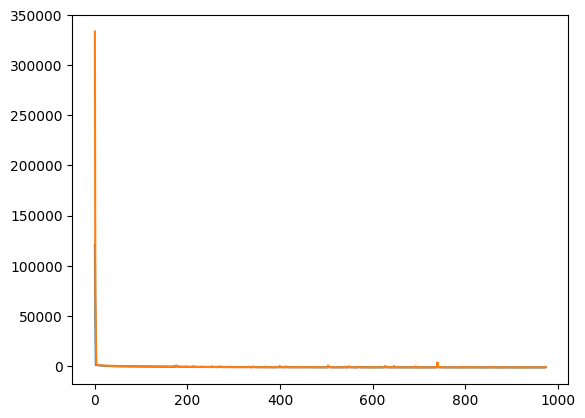

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 7.94473  validloss 8.43080±0.00000  bestvalidloss 8.43080  last_update 0
train: iter 1  trainloss 7.29269  validloss 7.65983±0.00000  bestvalidloss 7.65983  last_update 0
train: iter 2  trainloss 6.69499  validloss 7.05778±0.00000  bestvalidloss 7.05778  last_update 0
train: iter 3  trainloss 6.21161  validloss 6.52168±0.00000  bestvalidloss 6.52168  last_update 0
train: iter 4  trainloss 5.78408  validloss 6.05338±0.00000  bestvalidloss 6.05338  last_update 0
train: iter 5  trainloss 5.41843  validloss 5.66841±0.00000  bestvalidloss 5.66841  last_update 0
train: iter 6  trainloss 5.10254  validloss 5.29425±0.00000  bestvalidloss 5.29425  last_update 0
train: iter 7  trainloss 4.81904  validloss 4.98461±0.00000  bestvalidloss 4.98461  last_update 0
train: iter 8  trainloss 4.57064  validloss 4.71513±0.00000  bestvalidloss 4.71513  last_update 0
train: iter 9  trainloss 4.35776  validloss 4.47620±0.00000  bestvalidloss 4.47620  last_update 0
train: iter 10  trai

train: iter 85  trainloss 0.66669  validloss 0.38866±0.00000  bestvalidloss 0.38866  last_update 0
train: iter 86  trainloss 0.60565  validloss 0.36644±0.00000  bestvalidloss 0.36644  last_update 0
train: iter 87  trainloss 0.54993  validloss 0.34920±0.00000  bestvalidloss 0.34920  last_update 0
train: iter 88  trainloss 0.54956  validloss 0.33241±0.00000  bestvalidloss 0.33241  last_update 0
train: iter 89  trainloss 0.50141  validloss 0.28079±0.00000  bestvalidloss 0.28079  last_update 0
train: iter 90  trainloss 0.44103  validloss 0.23386±0.00000  bestvalidloss 0.23386  last_update 0
train: iter 91  trainloss 0.41881  validloss 0.21120±0.00000  bestvalidloss 0.21120  last_update 0
train: iter 92  trainloss 0.43010  validloss 0.20776±0.00000  bestvalidloss 0.20776  last_update 0
train: iter 93  trainloss 0.39884  validloss 0.17285±0.00000  bestvalidloss 0.17285  last_update 0
train: iter 94  trainloss 0.40167  validloss 0.13696±0.00000  bestvalidloss 0.13696  last_update 0
train: ite

train: iter 170  trainloss 0.06986  validloss -0.37554±0.00000  bestvalidloss -0.42719  last_update 6
train: iter 171  trainloss 0.05795  validloss -0.39631±0.00000  bestvalidloss -0.42719  last_update 7
train: iter 172  trainloss 0.08660  validloss -0.43212±0.00000  bestvalidloss -0.43212  last_update 0
train: iter 173  trainloss 0.08880  validloss -0.44358±0.00000  bestvalidloss -0.44358  last_update 0
train: iter 174  trainloss 0.09508  validloss -0.40510±0.00000  bestvalidloss -0.44358  last_update 1
train: iter 175  trainloss 0.08998  validloss -0.37226±0.00000  bestvalidloss -0.44358  last_update 2
train: iter 176  trainloss 0.11213  validloss -0.39133±0.00000  bestvalidloss -0.44358  last_update 3
train: iter 177  trainloss 0.06724  validloss -0.36815±0.00000  bestvalidloss -0.44358  last_update 4
train: iter 178  trainloss 0.07176  validloss -0.39292±0.00000  bestvalidloss -0.44358  last_update 5
train: iter 179  trainloss 0.08490  validloss -0.34757±0.00000  bestvalidloss -0.4

train: iter 257  trainloss 0.08508  validloss -0.36165±0.00000  bestvalidloss -0.46412  last_update 51
train: iter 258  trainloss 0.06582  validloss -0.35333±0.00000  bestvalidloss -0.46412  last_update 52
train: iter 259  trainloss 0.07875  validloss -0.41170±0.00000  bestvalidloss -0.46412  last_update 53
train: iter 260  trainloss 0.08212  validloss -0.38333±0.00000  bestvalidloss -0.46412  last_update 54
train: iter 261  trainloss 0.08678  validloss -0.41687±0.00000  bestvalidloss -0.46412  last_update 55
train: iter 262  trainloss 0.08653  validloss -0.37737±0.00000  bestvalidloss -0.46412  last_update 56
train: iter 263  trainloss 0.10805  validloss -0.39499±0.00000  bestvalidloss -0.46412  last_update 57
train: iter 264  trainloss 0.10161  validloss -0.42868±0.00000  bestvalidloss -0.46412  last_update 58
train: iter 265  trainloss 0.09637  validloss -0.39764±0.00000  bestvalidloss -0.46412  last_update 59
train: iter 266  trainloss 0.08290  validloss -0.39349±0.00000  bestvalid

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-3.5770, -0.1358, -3.5518, -1.9655], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 61.48760  validloss 69.89290±0.00000  bestvalidloss 69.89290  last_update 0
train: iter 1  trainloss 43.04416  validloss 52.76609±0.00000  bestvalidloss 52.76609  last_update 0
train: iter 2  trainloss 30.15887  validloss 36.14084±0.00000  bestvalidloss 36.14084  last_update 0
train: iter 3  trainloss 22.19600  validloss 26.69783±0.00000  bestvalidloss 26.69783  last_update 0
train: iter 4  trainloss 17.17559  validloss 20.54629±0.00000  bestvalidloss 20.54629  last_update 0
train: iter 5  trainloss 13.93720  validloss 16.51345±0.00000  bestvalidloss 16.51345  last_update 0
train: iter 6  trainloss 11.74764  validloss 13.84711±0.00000  bestvalidloss 13.84711  last_update 0
train: iter 7  trainloss 10.23662  validloss 11.99830±0.00000  bestvalidloss 11.99830  last_update 0
train: iter 8  trainloss 9.17722  validloss 10.67876±0.00000  bestvalidloss 10.67876  last_update 0
train: iter 9  trainloss 8.38633  validloss 9.77024±0.00000  bestvalidloss 9.77024  last_upd

train: iter 85  trainloss 3.61451  validloss 4.48456±0.00000  bestvalidloss 4.22862  last_update 5
train: iter 86  trainloss 3.62322  validloss 4.69339±0.00000  bestvalidloss 4.22862  last_update 6
train: iter 87  trainloss 3.62179  validloss 4.39379±0.00000  bestvalidloss 4.22862  last_update 7
train: iter 88  trainloss 3.61008  validloss 4.52628±0.00000  bestvalidloss 4.22862  last_update 8
train: iter 89  trainloss 3.63954  validloss 4.33414±0.00000  bestvalidloss 4.22862  last_update 9
train: iter 90  trainloss 3.62288  validloss 4.41354±0.00000  bestvalidloss 4.22862  last_update 10
train: iter 91  trainloss 3.61933  validloss 4.54509±0.00000  bestvalidloss 4.22862  last_update 11
train: iter 92  trainloss 3.62662  validloss 4.31364±0.00000  bestvalidloss 4.22862  last_update 12
train: iter 93  trainloss 3.60416  validloss 4.41370±0.00000  bestvalidloss 4.22862  last_update 13
train: iter 94  trainloss 3.59895  validloss 4.31969±0.00000  bestvalidloss 4.22862  last_update 14
train

train: iter 169  trainloss 3.49354  validloss 4.39683±0.00000  bestvalidloss 4.22862  last_update 89
train: iter 170  trainloss 3.49371  validloss 4.58126±0.00000  bestvalidloss 4.22862  last_update 90
train: iter 171  trainloss 3.53358  validloss 4.57284±0.00000  bestvalidloss 4.22862  last_update 91
train: iter 172  trainloss 3.54497  validloss 4.51960±0.00000  bestvalidloss 4.22862  last_update 92
train: iter 173  trainloss 3.50354  validloss 4.65890±0.00000  bestvalidloss 4.22862  last_update 93
train: iter 174  trainloss 3.53997  validloss 4.54642±0.00000  bestvalidloss 4.22862  last_update 94
train: iter 175  trainloss 3.50937  validloss 4.40131±0.00000  bestvalidloss 4.22862  last_update 95
train: iter 176  trainloss 3.49928  validloss 4.23169±0.00000  bestvalidloss 4.22862  last_update 96
train: iter 177  trainloss 3.50600  validloss 4.33511±0.00000  bestvalidloss 4.22862  last_update 97
train: iter 178  trainloss 3.52323  validloss 4.40484±0.00000  bestvalidloss 4.22862  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-9.2302)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(7.9096)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.0613557178628085
tensor([0.1972])
